In [1]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
from datetime import datetime

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('customerorders.csv')

In [3]:
df.head(20)
#df.info()


,source,orderId,subtotal,firstname,lastname,telephone,dob,order_date,dayofweek
0,NaN,100000001,730.62,Sumit,Gupta,3455,NaN,2013-10-13,1
1,NaN,100000002,449.10,Sumit,Gupta,91,NaN,2013-10-13,1
2,NaN,100000003,332.10,Sumit,Gupta,9341980003,NaN,2013-10-13,1
3,NaN,100000004,774.90,S,G,34,NaN,2013-10-19,7
4,NaN,100000005,369.00,Sumit,Gupta,9341980003,NaN,2013-10-19,7
5,NaN,100000006,774.90,Sumit,Gupta,9341980003,NaN,2013-10-19,7
6,NaN,100000007,359.10,Sumit,Gupta,9341980003,NaN,2013-10-21,2
7,NaN,100000008,449.00,Sumit,Gupta,1231231234,NaN,2013-10-26,7
8,NaN,100000009,449.00,Sumit,Gupta,9341980003,NaN,2013-10-27,1
9,NaN,100000010,449.00,Sumit,Gupta,9341980003,NaN,2013-10-27,1


In [4]:
df['OrderDate'] = pd.to_datetime(df['order_date'].str.strip(), format='%Y/%m/%d')
df.describe()

,subtotal,dayofweek
count,189181.000000,189181.000000
mean,793.539404,4.041748
std,2339.766361,1.929087
min,0.000000,1.000000
25%,449.000000,2.000000
50%,599.000000,4.000000
75%,899.000000,6.000000
max,949000.000000,7.000000


In [5]:

date1 = datetime.strptime('2018-06-01', '%Y-%m-%d')
df = df.loc[(df['source'] == 'Website')]
df = df.loc[(df['OrderDate']>date1)]

In [6]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
df['OrderMonth'] = df['OrderDate'].apply(get_month)
grouping = df.groupby('telephone')['OrderMonth']
#for name,group in grouping:
    #print (name)
    #print (group)
df['CohortMonth'] = grouping.transform('min')
df.tail()

,source,orderId,subtotal,firstname,lastname,telephone,dob,order_date,dayofweek,OrderDate,OrderMonth,CohortMonth
189171,Website,200033769,579.0,Anusha,Gowda,+919164339474,1991-04-20,2019-06-14,6,2019-06-14,2019-06-01,2019-06-01
189173,Website,100208212,399.0,Mamatha,k,9964455243,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-06-01
189175,Website,100208214,429.0,Rinki,Panda,8095214277,1990-08-20,2019-06-14,6,2019-06-14,2019-06-01,2018-07-01
189176,Website,200033770,529.0,saswati,dash,9000233776,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-08-01
189177,Website,200033771,1290.0,Chaitanya,Samith,9008933770,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-06-01


In [7]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'OrderMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 
df.tail()

,source,orderId,subtotal,firstname,lastname,telephone,dob,order_date,dayofweek,OrderDate,OrderMonth,CohortMonth,CohortIndex
189171,Website,200033769,579.0,Anusha,Gowda,+919164339474,1991-04-20,2019-06-14,6,2019-06-14,2019-06-01,2019-06-01,1.0
189173,Website,100208212,399.0,Mamatha,k,9964455243,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-06-01,13.0
189175,Website,100208214,429.0,Rinki,Panda,8095214277,1990-08-20,2019-06-14,6,2019-06-14,2019-06-01,2018-07-01,12.0
189176,Website,200033770,529.0,saswati,dash,9000233776,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-08-01,11.0
189177,Website,200033771,1290.0,Chaitanya,Samith,9008933770,NaN,2019-06-14,6,2019-06-14,2019-06-01,2018-06-01,13.0


In [8]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['telephone'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='telephone')
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2018-06-01,1885.0,257.0,211.0,200.0,179.0,151.0,172.0,147.0,153.0,138.0,140.0,143.0,137.0
2018-07-01,1555.0,172.0,126.0,111.0,116.0,109.0,93.0,102.0,84.0,73.0,88.0,28.0,NaN
2018-08-01,1623.0,122.0,107.0,104.0,111.0,77.0,81.0,82.0,72.0,79.0,28.0,NaN,NaN
2018-09-01,1412.0,84.0,87.0,92.0,76.0,64.0,61.0,54.0,65.0,21.0,NaN,NaN,NaN
2018-10-01,1251.0,82.0,85.0,62.0,63.0,63.0,51.0,59.0,22.0,NaN,NaN,NaN,NaN
2018-11-01,1225.0,90.0,57.0,61.0,53.0,51.0,49.0,20.0,NaN,NaN,NaN,NaN,NaN
2018-12-01,1303.0,71.0,71.0,62.0,42.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,1007.0,50.0,51.0,54.0,58.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,1210.0,68.0,48.0,50.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2018-06-01,100.0,13.6,11.2,10.6,9.5,8.0,9.1,7.8,8.1,7.3,7.4,7.6,7.3
2018-07-01,100.0,11.1,8.1,7.1,7.5,7.0,6.0,6.6,5.4,4.7,5.7,1.8,NaN
2018-08-01,100.0,7.5,6.6,6.4,6.8,4.7,5.0,5.1,4.4,4.9,1.7,NaN,NaN
2018-09-01,100.0,5.9,6.2,6.5,5.4,4.5,4.3,3.8,4.6,1.5,NaN,NaN,NaN
2018-10-01,100.0,6.6,6.8,5.0,5.0,5.0,4.1,4.7,1.8,NaN,NaN,NaN,NaN
2018-11-01,100.0,7.3,4.7,5.0,4.3,4.2,4.0,1.6,NaN,NaN,NaN,NaN,NaN
2018-12-01,100.0,5.4,5.4,4.8,3.2,4.3,1.7,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,100.0,5.0,5.1,5.4,5.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,100.0,5.6,4.0,4.1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


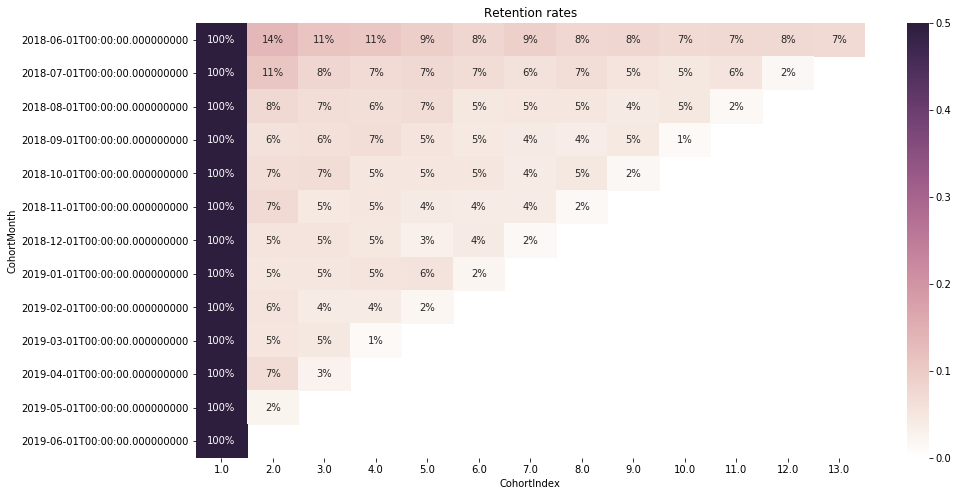

In [10]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5, cmap=cmap)
plt.show()

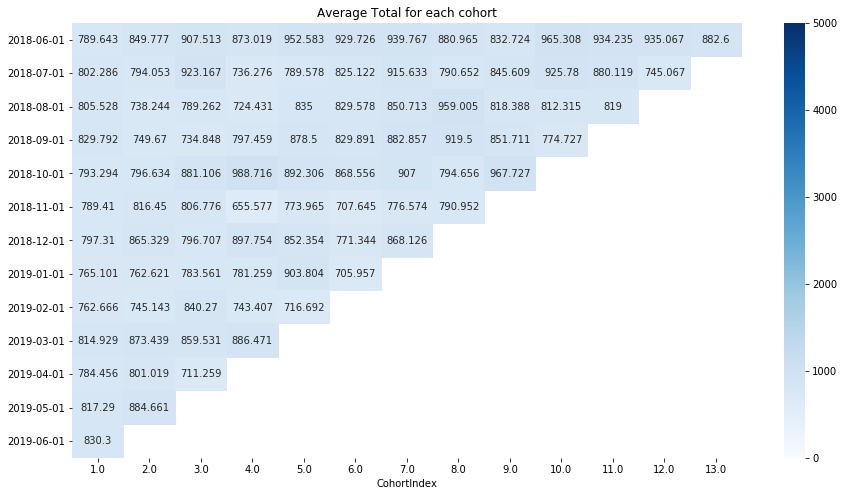

In [11]:
#Average subtotal for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['subtotal'].mean()
cohort_data = cohort_data.reset_index()
average_total = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='subtotal')
average_total.index = average_total.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average Total for each cohort')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(data=average_total,annot = True,vmin = 0.0,vmax =5000,cmap='Blues', fmt='g')
plt.show()

In [12]:
snapshot_date = df['OrderDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2019-06-15 00:00:00')

In [17]:
# Calculate RFM metrics
rfm = df.groupby(['telephone']).agg({'OrderDate': lambda x : (snapshot_date - x.max()).days
                                      ,'orderId':'count','subtotal': 'mean'})
#Function Lambdea: it gives the number of days between hypothetical today and the last transaction

#Rename columns
rfm.rename(columns={'OrderDate':'Recency','orderId':'Frequency','subtotal':'MonetaryValue'}
           ,inplace= True)

#Final RFM values
rfm = rfm.sort_values(by='Frequency',ascending=False)
rfm.head()

,Recency,Frequency,MonetaryValue
telephone,,,
7676507378,258,72,452.875000
9008493799,9,32,1451.187500
8095706186,29,30,1637.233333
9738009483,3,24,1536.083333
9611675784,32,24,1535.583333


In [38]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,MonetaryValue
0.25,79.0,1.0,529.0
0.50,169.0,1.0,649.0
0.75,270.0,2.0,933.5


In [39]:
quantiles = quantiles.to_dict()
quantiles 

{'Recency': {0.25: 79.0, 0.5: 169.0, 0.75: 270.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'MonetaryValue': {0.25: 529.0, 0.5: 649.0, 0.75: 933.5}}

In [40]:
RFM_Segment = rfm.copy()

In [41]:
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [43]:
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['MonetaryValue'].apply(FM_Class, args=('MonetaryValue',quantiles,))

In [44]:
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [47]:
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('MonetaryValue', ascending=False).head(5)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
telephone,,,,,,,
9663398789,73,3,3416.666667,4,4,4,444
8789500521,47,4,3026.250000,4,4,4,444
9538371980,16,13,3013.538462,4,4,4,444
9986975311,16,9,2996.777778,4,4,4,444
7760658822,16,16,2847.000000,4,4,4,444


In [48]:
#Which customers are at the verge of churning?
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('MonetaryValue', ascending=False).head(5)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
telephone,,,,,,,
9513008338,182,1,6350.000000,2,1,4,214
9986166935,215,1,6250.000000,2,1,4,214
9620545441,184,3,5713.333333,2,4,4,244
7829382552,355,1,5698.000000,1,1,4,114
9573597325,234,1,5397.300000,2,1,4,214


In [50]:
#Who are lost customers?
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(5)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
telephone,,,,,,,
7411434381,378,1,449.0,1,1,1,111
8486562551,378,1,429.0,1,1,1,111
9408916199,378,1,529.0,1,1,1,111
7892598472,378,1,429.0,1,1,1,111
9731628282,378,1,499.0,1,1,1,111


In [52]:
#Who are your loyal customers?
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('MonetaryValue', ascending=False).head(20)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
telephone,,,,,,,
9620545441,184,3,5713.333333,2,4,4,244
8762700800,17,2,4823.500000,4,3,4,434
9500366599,169,7,4734.285714,3,4,4,344
9902995995,325,2,4687.500000,1,3,4,134
9741330899,43,2,4192.000000,4,3,4,434
9769011488,185,2,3898.500000,2,3,4,234
9652026377,107,3,3742.333333,3,4,4,344
9663398789,73,3,3416.666667,4,4,4,444
8971355855,264,3,3198.000000,2,4,4,244
